## 01. Normalized prices

Absolute prices does not work for comparing different financial instruments because they are in different scale

In [ ]:
!pip install yfinance

In [2]:
import pandas as pd 
import yfinance as yf 

In [3]:
symbols = ['BA','MSFT','^DJI','EURUSD=X','GC=F','BTC-USD']

In [9]:
df = yf.download(symbols, start = '2020-12-10', end = '2021-12-13')
df.head()

[*********************100%***********************]  6 of 6 completed


Adj Close                          ... Volume                         
                    BA       BTC-USD  EURUSD=X  ...   GC=F        MSFT         ^DJI
Date                                            ...                                
2020-12-10  234.429993  18264.992188  1.207875  ...  177.0  26733300.0  325550000.0
2020-12-11  230.330002  18058.904297  1.214429  ...  109.0  30979400.0  393870000.0
2020-12-12         NaN  18803.656250       NaN  ...    NaN         NaN          NaN
2020-12-13         NaN  19142.382812       NaN  ...    NaN         NaN          NaN
2020-12-14  228.619995  19246.644531  1.213340  ...  258.0  28798400.0  371980000.0

[5 rows x 36 columns]

### 01.01. Base value (100)

In [10]:
close = df.Close.copy()  
close.describe()

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
count,253.000000,369.000000,263.000000,254.000000,253.000000,253.000000
mean,225.807431,45948.625646,1.188224,1801.775982,269.417035,33725.506894
std,15.902951,11323.989475,0.026522,51.975765,36.343173,1784.128444
min,188.190002,18058.904297,1.120298,1677.699951,210.520004,29861.550781
25%,213.360001,36178.140625,1.173007,1768.424988,239.509995,32485.589844
50%,223.570007,47096.945312,1.188594,1794.399963,260.739990,34314.671875
75%,236.679993,56099.519531,1.212217,1837.100006,296.769989,34987.019531
max,269.190002,67566.828125,1.234111,1952.699951,343.109985,36432.218750


In [11]:
first_row = close.iloc[0]
first_row

BA            234.429993
BTC-USD     18264.992188
EURUSD=X        1.207875
GC=F         1833.599976
MSFT          210.520004
^DJI        29999.259766
Name: 2020-12-10 00:00:00, dtype: float64

In [15]:
norm = close.div(first_row).mul(100) 
norm

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2020-12-10,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2020-12-11,98.251081,98.871678,100.542606,100.338137,101.301534,100.157035
2020-12-12,NaN,102.949161,NaN,NaN,NaN,NaN
2020-12-13,NaN,104.803674,NaN,NaN,NaN,NaN
2020-12-14,97.521649,105.374502,100.452450,99.732765,101.748049,99.540959
...,...,...,...,...,...,...
2021-12-09,88.538158,261.002691,93.930111,96.782286,158.227247,119.185246
2021-12-10,87.471742,258.654941,93.497311,97.234950,162.711382,119.906253
2021-12-11,NaN,270.257481,NaN,NaN,NaN,NaN


### 01.02 Visualize Normalized Prices

In [14]:
import matplotlib.pyplot as plt 
plt.style.use('seaborn')

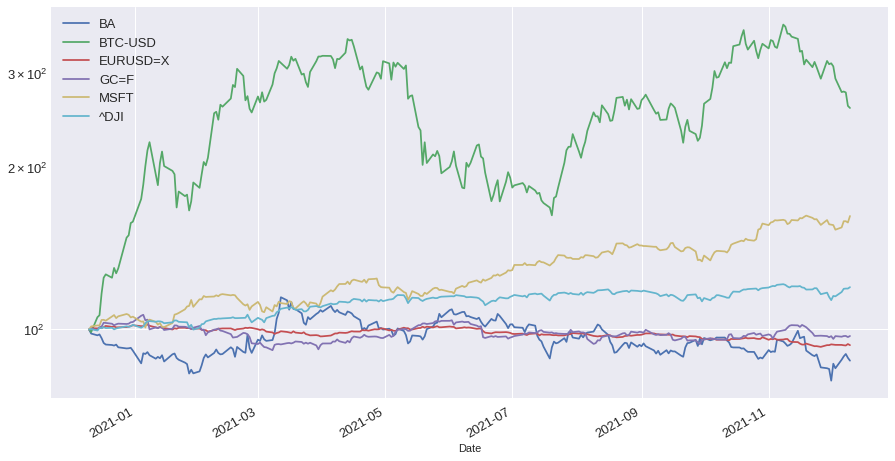

In [18]:
#log scale 
norm.dropna().plot(figsize = (15,8), fontsize = 13,logy = True)
plt.legend(fontsize = 13)
plt.show()

## 02. Returns

Normalized prices help to compare financial instruments... but they are limited when it comes to measuring/comparing performance in more detail

The relative price changes **(returns)** are similar to interest rate

In [19]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format 

In [28]:
msft = close.MSFT.dropna().to_frame().copy()
msft.rename(columns = {'MSFT':'price'},inplace = True)
msft.head()

,price
Date,
2020-12-10,210.5200
2020-12-11,213.2600
2020-12-14,214.2000
2020-12-15,214.1300
2020-12-16,219.2800


### 02.01. Alternative 1

In [31]:
msft_shifted = msft.shift(periods = 1)
msft['price_lag1'] = msft_shifted
msft.head()

,price,price_lag1
Date,,
2020-12-10,210.5200,nan
2020-12-11,213.2600,210.5200
2020-12-14,214.2000,213.2600
2020-12-15,214.1300,214.2000
2020-12-16,219.2800,214.1300


In [34]:
msft.price.div(msft.price_lag1) -1 

Date
2020-12-10       nan
2020-12-11    0.0130
2020-12-14    0.0044
2020-12-15   -0.0003
2020-12-16    0.0241
               ...  
2021-12-06    0.0098
2021-12-07    0.0268
2021-12-08    0.0001
2021-12-09   -0.0056
2021-12-10    0.0283
Length: 253, dtype: float64

### 02.02. Alternative 2

In [35]:

msft['returns'] = msft.price.pct_change(periods = 1)
msft.head()

,price,price_lag1,returns
Date,,,
2020-12-10,210.5200,nan,nan
2020-12-11,213.2600,210.5200,0.0130
2020-12-14,214.2000,213.2600,0.0044
2020-12-15,214.1300,214.2000,-0.0003
2020-12-16,219.2800,214.1300,0.0241


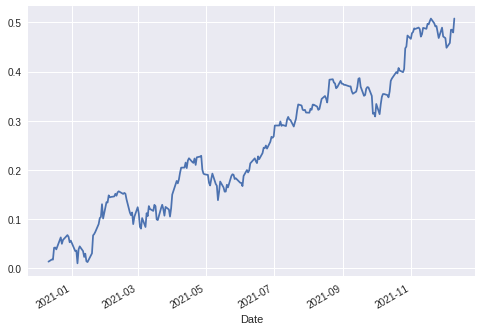

In [38]:
msft.returns.cumsum().plot()
plt.show()